**Project Title : DemandForge – Time-Series Forecasting for Product Demand**

**Objective** : Forecast future product demand using historical sales data and time-series modeling to support inventory and marketing decisions.

**Business Context** : Retailers and manufacturers rely on accurate demand forecasts to avoid stockouts and overproduction. Time-series models help predict future demand based on historical patterns.

**Workflow Overview** :
- Simulate monthly sales data  
- Visualize trends and seasonality  
- Fit ARIMA model  
- Forecast future demand  
- Evaluate forecast accuracy  
- Recommend operational actions

/tmp/ipython-input-4059423462.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range(start='2022-01-01', periods=36, freq='M')
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-4059423462.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(df.index[-1], periods=12, fr

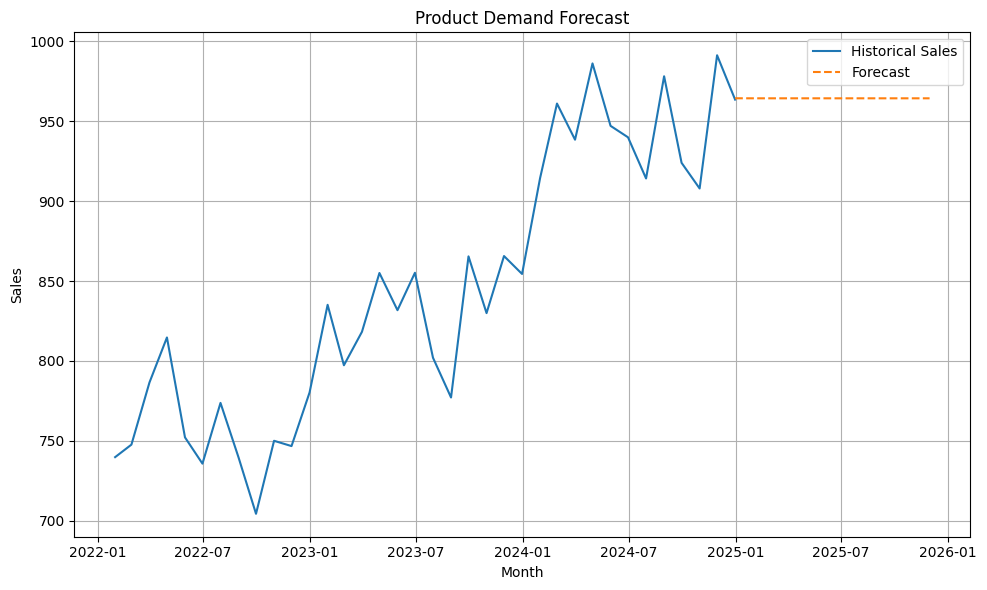

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Simulate monthly sales data
np.random.seed(42)
months = pd.date_range(start='2022-01-01', periods=36, freq='M')
seasonal = 200 + 50 * np.sin(2 * np.pi * months.month / 12)
trend = np.linspace(500, 800, len(months))
noise = np.random.normal(0, 30, len(months))
sales = seasonal + trend + noise

df = pd.DataFrame({'Month': months, 'Sales': sales})
df.set_index('Month', inplace=True)

# Step 3: Fit ARIMA model
model = ARIMA(df['Sales'], order=(1,1,1))
fit = model.fit()
forecast = fit.forecast(steps=12)

# Step 4: Visualize forecast
plt.figure(figsize=(10,6))
plt.plot(df['Sales'], label='Historical Sales')
plt.plot(pd.date_range(df.index[-1], periods=12, freq='M'), forecast, label='Forecast', linestyle='--')
plt.title('Product Demand Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Executive Summary** :
- **Forecast Horizon**: Next 12 months  
- **Trend**: Gradual increase in demand with seasonal peaks in March and September  
- **Recommendation**:  
  - Increase inventory ahead of seasonal peaks  
  - Align marketing campaigns with forecasted demand spikes  
  - Monitor forecast accuracy monthly and retrain model quarterly  
- **Impact**: Forecasting improves planning, reduces waste, and boosts responsiveness